## Descrição do caso
https://www.kaggle.com/datasets/bhadramohit/mental-health-dataset

## Compreensivos Insights sobre Saúde Mental: Um Conjunto de Dados Diversificado de 1000 Indivíduos Através de Profissões, Países e Estilos de Vida

Este conjunto de dados oferece uma coleção rica de informações anônimas sobre saúde mental de 1000 indivíduos, representando uma ampla gama de idades, gêneros, profissões e países. O objetivo é esclarecer os diversos fatores que afetam a saúde mental, oferecendo insights valiosos sobre níveis de estresse, padrões de sono, equilíbrio entre trabalho e vida pessoal e atividade física.

Principais Características:

Demografia: O conjunto de dados inclui indivíduos de diversos países, como EUA, Índia, Reino Unido, Canadá e Austrália. Cada registro captura informações demográficas importantes, como idade, gênero e ocupação (por exemplo, TI, Saúde, Educação, Engenharia).

Condições de Saúde Mental: O conjunto de dados contém informações sobre se os indivíduos relataram problemas de saúde mental (Sim/Não), juntamente com a gravidade dessas condições, categorizadas em Baixa, Média ou Alta.

Histórico de Consultas: Para indivíduos com condições de saúde mental, o conjunto de dados indica se eles consultaram um profissional de saúde mental.
Níveis de Estresse: O nível de estresse de cada indivíduo é classificado como Baixo, Médio ou Alto, fornecendo insights sobre como diferentes fatores, como horas de trabalho ou sono, podem se correlacionar com o bem-estar mental.

Fatores de Estilo de Vida: O conjunto de dados inclui informações sobre duração do sono, horas de trabalho por semana e horas de atividade física semanal, oferecendo uma visão detalhada de como os fatores de estilo de vida contribuem para a saúde mental.

Este conjunto de dados pode ser usado para pesquisa, análise ou modelos de aprendizado de máquina para prever tendências de saúde mental, descobrir correlações entre equilíbrio entre trabalho e vida pessoal e bem-estar mental, e explorar o impacto do estresse e da atividade física na saúde mental.

## Definição do Problema 

# Definição do Problema
Este projeto visa analisar dados anônimos sobre saúde mental de 1000 indivíduos, representando diferentes idades, gêneros, profissões e países. O objetivo é identificar fatores que influenciam a saúde mental, como estresse, padrões de sono, equilíbrio entre trabalho e vida pessoal e atividade física.

## Questões a serem respondidas:
1. Quais fatores contribuem mais para altos níveis de estresse?
2. Como os padrões de sono estão relacionados aos problemas de saúde mental?
3. O equilíbrio entre trabalho e vida pessoal impacta a saúde mental?
4. A atividade física desempenha um papel importante na redução dos níveis de estresse?

## Métrica de Avaliação
Como estamos lidando com um problema de classificação (ex.: presença ou ausência de problemas de saúde mental), utilizaremos o F1-Score como métrica principal, pois consideramos tanto precisão quanto recall.


## Carregar Dados

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:

# Importar dados 
# Carregar o dataset
df = pd.read_csv('C:/Users/karin/OneDrive/Área de Trabalho/data science/mental_health_dataset.csv')

# Exibir as primeiras linhas para verificar
df.head()

User_ID  Age      Gender  Occupation    Country Mental_Health_Condition  \
0        1   36  Non-binary       Sales     Canada                      No   
1        2   34      Female   Education         UK                     Yes   
2        3   65  Non-binary       Sales        USA                     Yes   
3        4   34        Male       Other  Australia                      No   
4        5   22      Female  Healthcare     Canada                     Yes   

  Severity Consultation_History Stress_Level  Sleep_Hours  Work_Hours  \
0   Medium                  Yes       Medium          7.1          46   
1      NaN                   No          Low          7.5          47   
2     High                   No          Low          8.4          58   
3      Low                   No       Medium          9.8          30   
4      Low                   No       Medium          4.9          62   

   Physical_Activity_Hours  
0                        5  
1                        8  
2                       10  
3                        2  
4                        5

## Análise Exploratória de Dados (EDA)
Nesta seção, analisaremos as principais características do dataset para entender a distribuição das variáveis e possíveis correlações.


In [4]:
# Estatísticas descritivas
df.describe()

User_ID         Age  Sleep_Hours   Work_Hours  \
count  1000.000000  1000.00000  1000.000000  1000.000000   
mean    500.500000    41.89200     7.095600    54.621000   
std     288.819436    13.97475     1.713861    14.709035   
min       1.000000    18.00000     4.000000    30.000000   
25%     250.750000    30.00000     5.600000    42.000000   
50%     500.500000    42.00000     7.100000    55.000000   
75%     750.250000    54.00000     8.500000    67.000000   
max    1000.000000    65.00000    10.000000    80.000000   

       Physical_Activity_Hours  
count              1000.000000  
mean                  5.134000  
std                   3.081808  
min                   0.000000  
25%                   3.000000  
50%                   5.000000  
75%                   8.000000  
max                  10.000000

In [5]:
# Verificar valores nulos
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64

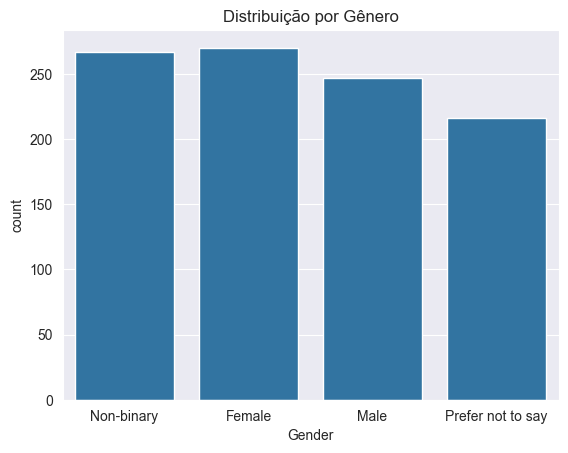

In [6]:
# Contagem de valores por gênero
sns.countplot(x='Gender', data=df)
plt.title("Distribuição por Gênero")
plt.show()

## Remoção de Linhas com Valores Nulos
Na análise de valores nulos, vimos que a coluna Severity possui 501 valores nulos.  Para resolver isso, decidi:

Remover as linhas com valores nulos

In [7]:
# Removendo linhas com valores nulos
df.dropna(inplace=True)

# Verificando se ainda existem valores nulos
print(df.isnull().sum())


User_ID                    0
Age                        0
Gender                     0
Occupation                 0
Country                    0
Mental_Health_Condition    0
Severity                   0
Consultation_History       0
Stress_Level               0
Sleep_Hours                0
Work_Hours                 0
Physical_Activity_Hours    0
dtype: int64


## Análise Multivariada e Bivariada
Vamos explorar relações entre as variáveis usando gráficos de dispersão e análise de componentes principais (PCA) para entender melhor a variabilidade dos dados.


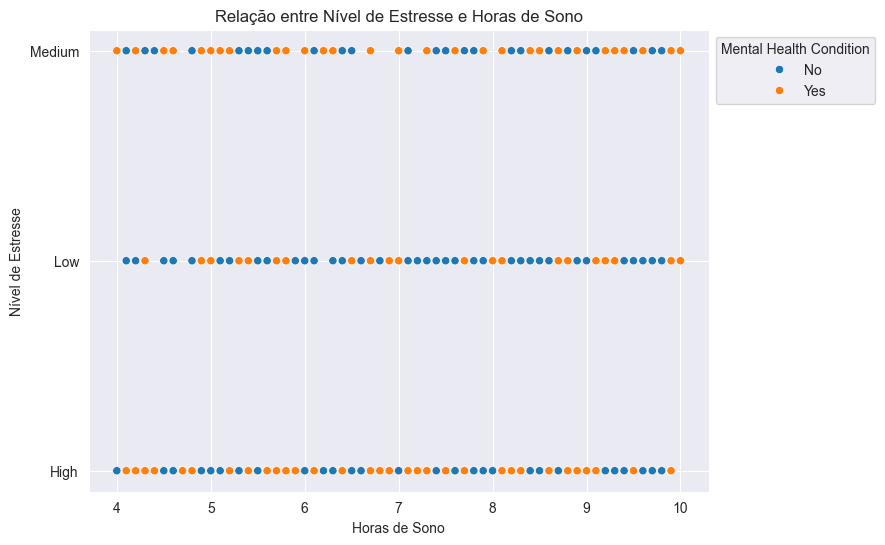

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep_Hours', y='Stress_Level', hue='Mental_Health_Condition', data=df)
plt.title("Relação entre Nível de Estresse e Horas de Sono")
plt.xlabel("Horas de Sono")
plt.ylabel("Nível de Estresse")
plt.legend(title="Mental Health Condition", loc='upper left', bbox_to_anchor=(1, 1))  # Legenda fora do gráfico
plt.show()


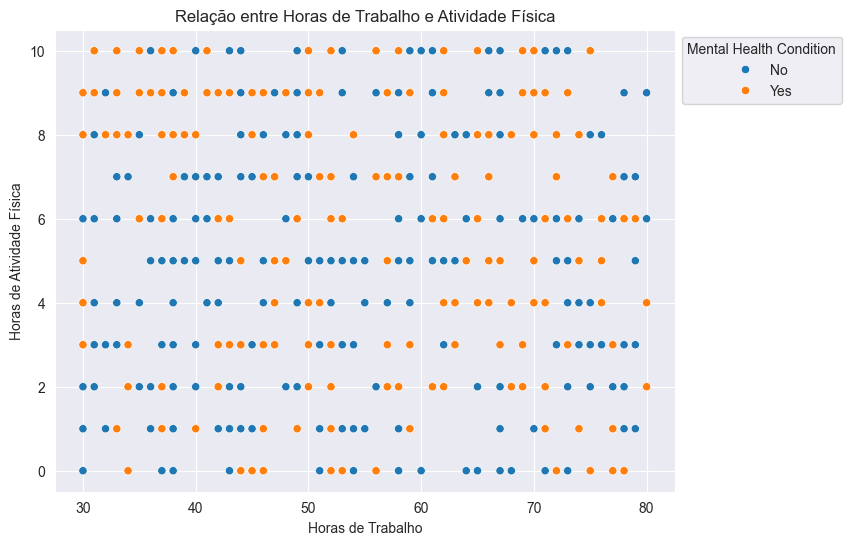

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Work_Hours', y='Physical_Activity_Hours', hue='Mental_Health_Condition', data=df)
plt.title("Relação entre Horas de Trabalho e Atividade Física")
plt.xlabel("Horas de Trabalho")
plt.ylabel("Horas de Atividade Física")
plt.legend(title="Mental Health Condition", loc='upper left', bbox_to_anchor=(1, 1))  # Legenda fora do gráfico
plt.show()


## Análise de Componentes Principais (PCA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Index(['User_ID', 'Age', 'Sleep_Hours', 'Work_Hours',
       'Physical_Activity_Hours', 'Gender_Male', 'Gender_Non-binary',
       'Gender_Prefer not to say', 'Occupation_Engineering',
       'Occupation_Finance', 'Occupation_Healthcare', 'Occupation_IT',
       'Occupation_Other', 'Occupation_Sales', 'Country_Canada',
       'Country_Germany', 'Country_India', 'Country_Other', 'Country_UK',
       'Country_USA', 'Mental_Health_Condition_Yes', 'Severity_Low',
       'Severity_Medium', 'Consultation_History_Yes', 'Stress_Level_Low',
       'Stress_Level_Medium'],
      dtype='object')


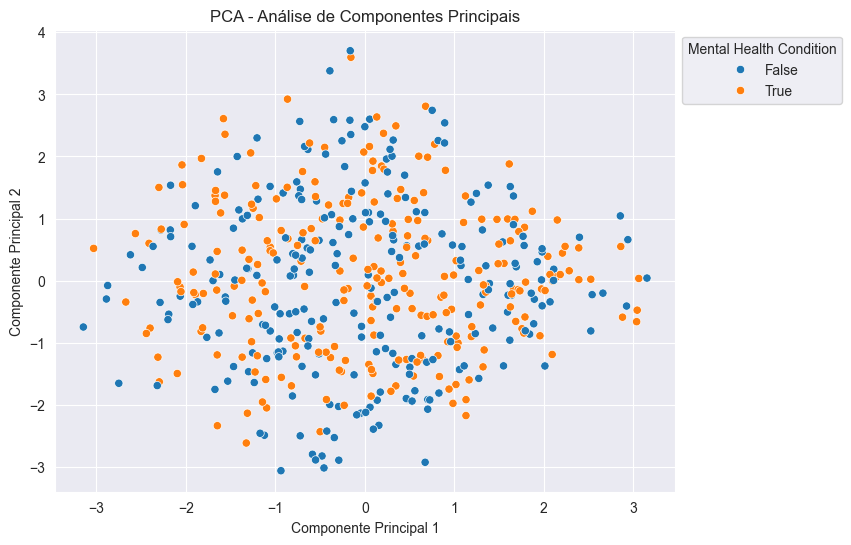

In [11]:
# Transformar colunas categóricas em numéricas usando pd.get_dummies()
df_encoded = pd.get_dummies(df, drop_first=True)

# Exibir as colunas para verificar quais foram criadas
print(df_encoded.columns)

# Normalizar os dados (remova apenas 'Mental_Health_Condition_Yes', se existir)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop(columns=['Mental_Health_Condition_Yes'], errors='ignore'))

# Aplicando PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Visualizando os componentes principais
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_components[:, 0],
    y=pca_components[:, 1],
    hue=df_encoded.get('Mental_Health_Condition_Yes', default=0)
)
plt.title("PCA - Análise de Componentes Principais")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Mental Health Condition", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

##  Data Wrangling e Pré-processamento

In [12]:
# Definir a variável-alvo (y) e as features (X)
y = df_encoded['Mental_Health_Condition_Yes']
X = df_encoded.drop(columns=['Mental_Health_Condition_Yes'])

# Exibir as dimensões para verificação
print(f"Dimensões de X: {X.shape}, Dimensões de y: {y.shape}")


Dimensões de X: (499, 25), Dimensões de y: (499,)


## Revisão e Limpeza Completa dos Dados

In [13]:
# Importação de bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Carregar o dataset
df = pd.read_csv('C:/Users/karin/OneDrive/Área de Trabalho/data science/mental_health_dataset.csv')

# Verificar valores nulos
print(df.isnull().sum())

# Remover linhas com valores nulos
df.dropna(inplace=True)

# Excluir colunas irrelevantes
df.drop(columns=['User_ID'], inplace=True)


User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64


## Tratamento de Valores Nulos:
lidando com valores nulos. Em vez de remover todos, uso a estratégia de imputação para Severity

In [50]:
# Verificar os valores únicos e o tipo de dado na coluna 'Severity'
print(df['Severity'].unique())
print(df['Severity'].dtype)


['Medium' 'High' 'Low']
object


In [56]:
print(df['Severity'].unique())
print(df['Severity'].isnull().sum())  # Ver quantos valores nulos existem


['Medium' 'High' 'Low']
0


In [58]:
# Converter 'Severity' para categórico (opcional)
df['Severity'] = df['Severity'].astype('category')

## Codificação de Variáveis Categóricas e Normalização

### Checar Consistência Geral
Objetivo: Verificar se todas as colunas estão no formato correto e não possuem dados inconsistentes.

In [59]:
print(df.info())  # Tipos de dados e colunas
print(df.isnull().sum())  # Verificar valores nulos restantes
print(df.describe(include='all'))  # Estatísticas descritivas completas


<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      499 non-null    float64 
 1   Gender                   499 non-null    object  
 2   Occupation               499 non-null    object  
 3   Country                  499 non-null    object  
 4   Mental_Health_Condition  499 non-null    object  
 5   Severity                 499 non-null    category
 6   Consultation_History     499 non-null    object  
 7   Sleep_Hours              499 non-null    float64 
 8   Work_Hours               499 non-null    float64 
 9   Physical_Activity_Hours  499 non-null    float64 
 10  Overworked               499 non-null    int32   
 11  Insufficient_Sleep       499 non-null    int32   
 12  Regular_Exercise         499 non-null    int32   
 13  Stress_Level_High        499 non-null    bool    
 14  Stress_Level_Lo

### Codificação de Variáveis Categóricas
A codificação é necessária para as variáveis categóricas no formato object (e.g., Gender, Occupation, Country, Consultation_History, Mental_Health_Condition). O objetivo é transformar essas colunas em representações numéricas.

In [60]:
# Aplicar One-Hot Encoding para variáveis categóricas
df = pd.get_dummies(df, columns=['Gender', 'Occupation', 'Country', 'Consultation_History', 'Mental_Health_Condition'], drop_first=True)

# Verificar o DataFrame após codificação
print(df.head())


        Age Severity  Sleep_Hours  Work_Hours  Physical_Activity_Hours  \
0 -0.438032   Medium     0.023176   -0.536922                -0.067403   
2  1.694077     High     0.786321    0.292350                 1.565309   
3 -0.585074      Low     1.608171   -1.642619                -1.047029   
4 -1.467326      Low    -1.268302    0.568775                -0.067403   
5  1.620556     High    -0.446453   -1.366195                -1.700114   

   Overworked  Insufficient_Sleep  Regular_Exercise  Stress_Level_High  \
0           0                   0                 0              False   
2           0                   0                 1              False   
3           0                   0                 0              False   
4           1                   1                 0              False   
5           0                   0                 0               True   

   Stress_Level_Low  ...  Occupation_Healthcare  Occupation_IT  \
0             False  ...                  Fa

In [62]:
# Mapear os valores de 'Severity' para números
severity_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Severity'] = df['Severity'].map(severity_mapping)


In [63]:
print(df['Severity'].unique())  # Deve exibir: [0, 1, 2]


[1, 2, 0]
Categories (3, int64): [2, 0, 1]


### Revisar correlações
Por quê: Identificar variáveis altamente correlacionadas (e.g., correlação > 0.9) para evitar redundâncias e melhorar a eficiência do modelo.

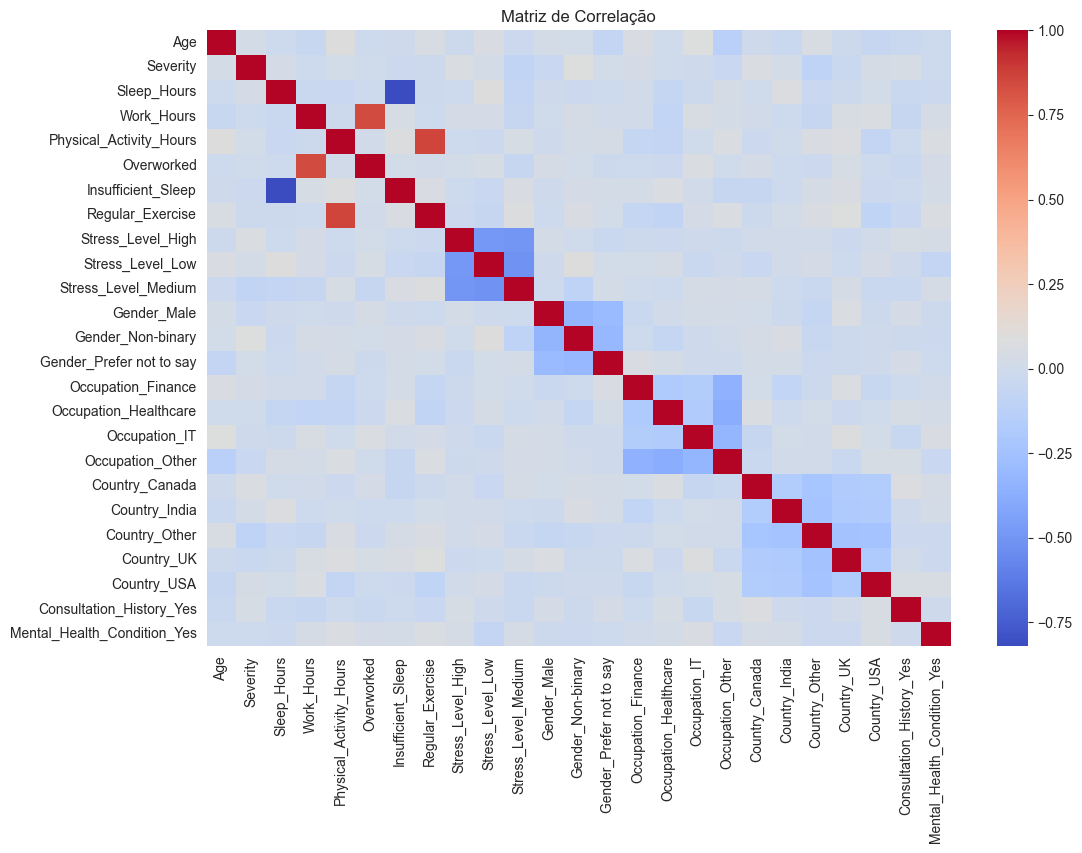

                         level_0                      level_1    0
0                            Age                          Age  1.0
26                      Severity                     Severity  1.0
52                   Sleep_Hours                  Sleep_Hours  1.0
78                    Work_Hours                   Work_Hours  1.0
104      Physical_Activity_Hours      Physical_Activity_Hours  1.0
130                   Overworked                   Overworked  1.0
156           Insufficient_Sleep           Insufficient_Sleep  1.0
182             Regular_Exercise             Regular_Exercise  1.0
208            Stress_Level_High            Stress_Level_High  1.0
234             Stress_Level_Low             Stress_Level_Low  1.0
260          Stress_Level_Medium          Stress_Level_Medium  1.0
286                  Gender_Male                  Gender_Male  1.0
312            Gender_Non-binary            Gender_Non-binary  1.0
338     Gender_Prefer not to say     Gender_Prefer not to say 

In [64]:
# Matriz de correlação
corr_matrix = df.corr()

# Plotar a matriz de correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Identificar pares altamente correlacionados (correlação > 0.9)
high_corr_pairs = corr_matrix.abs().stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] > 0.9]  # Correlação > 0.9
print(high_corr_pairs)


### Correção para Identificar Correlações Relevantes
Atualize o código para ignorar as correlações de cada coluna consigo mesma:

In [65]:
# Identificar pares altamente correlacionados (correlação > 0.9, entre colunas diferentes)
high_corr_pairs = corr_matrix.abs().stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]  # Excluir a diagonal
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] > 0.9]  # Filtrar correlação > 0.9
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Mostrar pares altamente correlacionados
print(high_corr_pairs)


Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


###  Análise de Outliers

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Função para detectar outliers usando o IQR
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

# Aplicar a função para colunas numéricas
for coluna in ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']:
    df = remover_outliers(df, coluna)

print(f"Novo shape após remoção de outliers: {df.shape}")


Novo shape após remoção de outliers: (499, 25)


##  Feature Engineering
Criação de novas features a partir das colunas existentes pode ajudar o modelo a capturar mais informações relevantes. Aqui estão algumas ideias:

Criar uma coluna para "Excesso de Trabalho" (Work_Hours > 60).

Criar uma coluna para "Sono Insuficiente" (Sleep_Hours < 6).

Criar uma coluna de "Atividade Física Regular" (Physical_Activity_Hours > 5).

In [69]:
# Feature Engineering
df['Overworked'] = (df['Work_Hours'] > 60).astype(int)
df['Insufficient_Sleep'] = (df['Sleep_Hours'] < 6).astype(int)
df['Regular_Exercise'] = (df['Physical_Activity_Hours'] > 5).astype(int)


## Normalização e Escalonamento

In [70]:
from sklearn.preprocessing import StandardScaler

# Identificar colunas numéricas para escalonamento
colunas_numericas = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']

# Aplicar StandardScaler
scaler = StandardScaler()
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])


## Codificação de Variáveis Categóricas

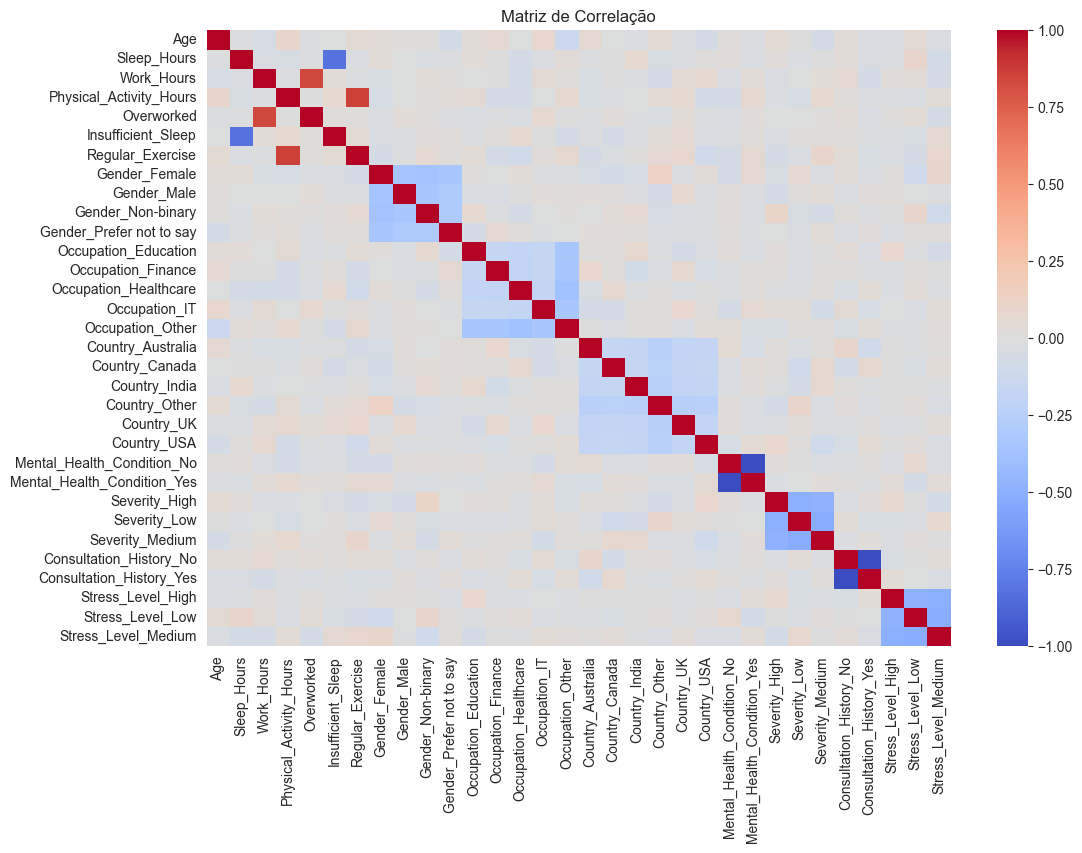

In [71]:
import seaborn as sns

# Calcular a matriz de correlação
corr = df_encoded.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

# Identificar e remover colunas altamente correlacionadas (coeficiente > 0.9)
colunas_corr_altas = [coluna for coluna in corr.columns if any(corr[coluna] > 0.9) and coluna != 'Mental_Health_Condition_Yes']
df_encoded = df_encoded.drop(columns=colunas_corr_altas)


## Preparação para Modelagem
Separar as Variáveis Preditivas (X) e Alvo (y):

X contém todas as features exceto a variável-alvo (Mental_Health_Condition_Yes).
y contém a variável-alvo.

In [72]:
# Separar variáveis preditoras e alvo
X = df.drop(columns=['Mental_Health_Condition_Yes'])
y = df['Mental_Health_Condition_Yes']


In [73]:
from sklearn.model_selection import train_test_split

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificar as dimensões
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


X_train: (349, 24), X_test: (150, 24)


## Balanceamento do Conjunto de Treino
Verifique o balanceamento da variável-alvo no conjunto de treino (y_train). Se estiver desequilibrado, use SMOTE para balanceá-lo.

Verificar o Balanceamento

In [74]:
print(y_train.value_counts())  # Contagem de classes no treino


Mental_Health_Condition_Yes
False    176
True     173
Name: count, dtype: int64


In [76]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear os dados de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar o balanceamento após SMOTE
print(y_train_balanced.value_counts())


Mental_Health_Condition_Yes
True     176
False    176
Name: count, dtype: int64


In [78]:
# Verificar valores ausentes no conjunto de treino e teste
print(X_train_balanced.isnull().sum())  # Soma de valores nulos por coluna
print(X_test.isnull().sum())


Age                         0
Severity                    1
Sleep_Hours                 0
Work_Hours                  0
Physical_Activity_Hours     0
Overworked                  0
Insufficient_Sleep          0
Regular_Exercise            0
Stress_Level_High           0
Stress_Level_Low            0
Stress_Level_Medium         0
Gender_Male                 0
Gender_Non-binary           0
Gender_Prefer not to say    0
Occupation_Finance          0
Occupation_Healthcare       0
Occupation_IT               0
Occupation_Other            0
Country_Canada              0
Country_India               0
Country_Other               0
Country_UK                  0
Country_USA                 0
Consultation_History_Yes    0
dtype: int64
Age                         0
Severity                    0
Sleep_Hours                 0
Work_Hours                  0
Physical_Activity_Hours     0
Overworked                  0
Insufficient_Sleep          0
Regular_Exercise            0
Stress_Level_High          

### Imputar o Valor Faltante em X_train_balanced

In [79]:
from sklearn.impute import SimpleImputer

# Imputador para preencher valores nulos na coluna Severity
imputer = SimpleImputer(strategy='most_frequent')

# Aplicar imputação somente na coluna Severity
X_train_balanced['Severity'] = imputer.fit_transform(X_train_balanced[['Severity']])


In [80]:
print(X_train_balanced.isnull().sum())  # Deve retornar 0 para todas as colunas


Age                         0
Severity                    0
Sleep_Hours                 0
Work_Hours                  0
Physical_Activity_Hours     0
Overworked                  0
Insufficient_Sleep          0
Regular_Exercise            0
Stress_Level_High           0
Stress_Level_Low            0
Stress_Level_Medium         0
Gender_Male                 0
Gender_Non-binary           0
Gender_Prefer not to say    0
Occupation_Finance          0
Occupation_Healthcare       0
Occupation_IT               0
Occupation_Other            0
Country_Canada              0
Country_India               0
Country_Other               0
Country_UK                  0
Country_USA                 0
Consultation_History_Yes    0
dtype: int64


## Divisão dos Dados em Treino e Teste

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# Dicionário de modelos
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(max_iter=500, random_state=42)
}

# Avaliar cada modelo
resultados = []
for nome, modelo in modelos.items():
    modelo.fit(X_train_balanced, y_train_balanced)  # Treino no conjunto balanceado
    y_pred = modelo.predict(X_test)  # Previsões no conjunto de teste

    # Métricas de desempenho
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    resultados.append({"Modelo": nome, "Acurácia": acc, "F1-Score": f1})

# Mostrar resultados
import pandas as pd
resultados_df = pd.DataFrame(resultados)
print(resultados_df)


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


                Modelo  Acurácia  F1-Score
0  Logistic Regression  0.446667  0.402878
1        Random Forest  0.506667  0.506667
2    Gradient Boosting  0.486667  0.421053
3       MLP Classifier  0.460000  0.408759


## Análise de Colinearidade
A colinearidade ocorre quando duas ou mais variáveis estão altamente correlacionadas, introduzindo redundância e dificultando o aprendizado dos modelos. Vamos identificar e remover colunas redundantes.

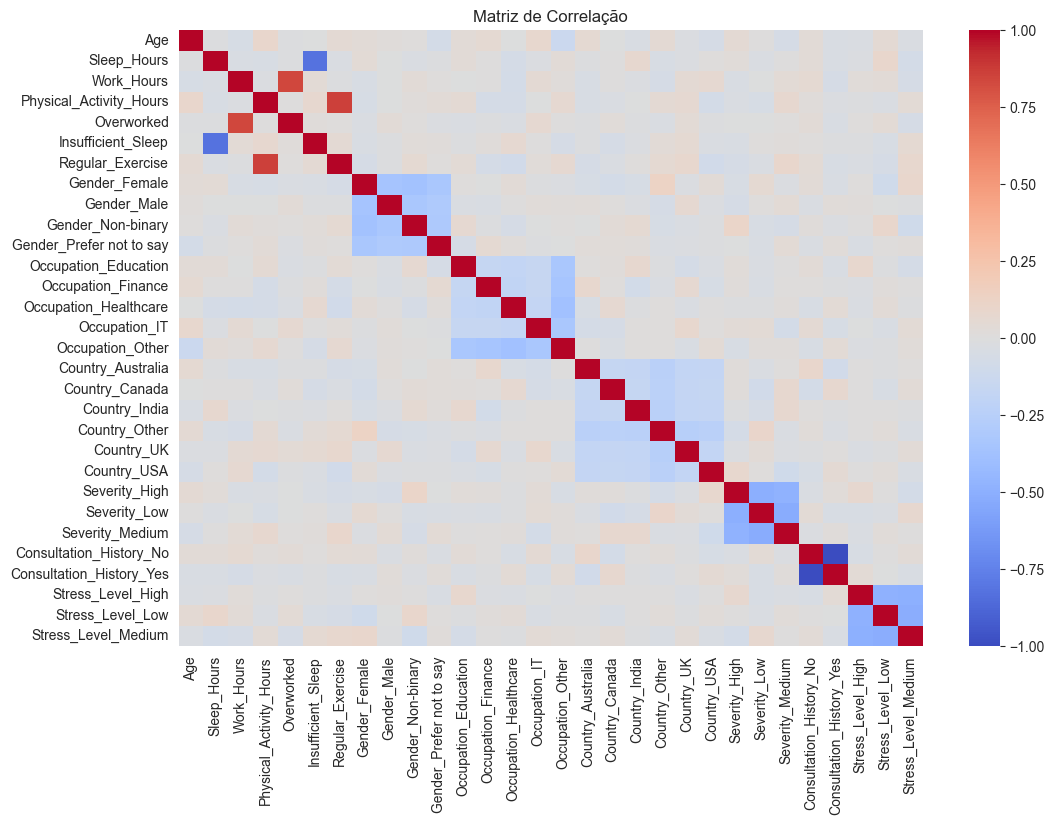

Colunas altamente correlacionadas: []


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Matriz de correlação
corr_matrix = X.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Identificar variáveis altamente correlacionadas (coeficiente > 0.9)
colunas_corr_altas = [
    coluna for coluna in corr_matrix.columns
    if any(corr_matrix[coluna] > 0.9) and coluna != coluna
]

print(f"Colunas altamente correlacionadas: {colunas_corr_altas}")


## Revisar as Distribuições
Vamos verificar as distribuições das variáveis numéricas. Transformações podem ser aplicadas para corrigir assimetrias ou outliers.

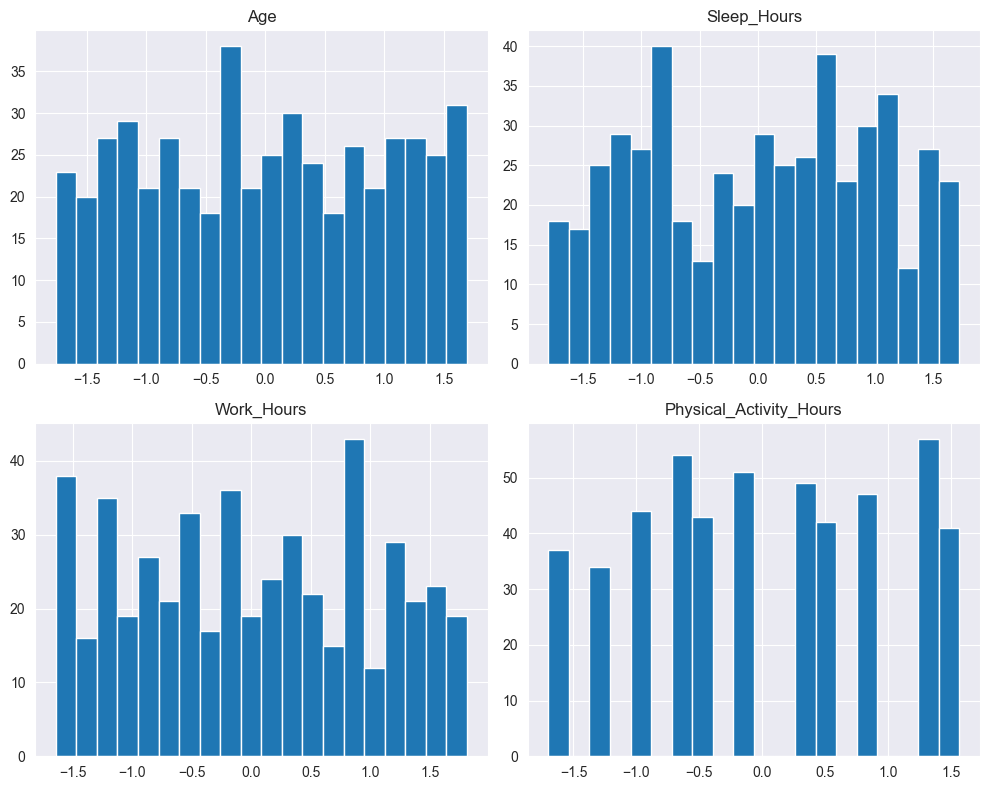

In [30]:
# Visualizar as distribuições das variáveis numéricas
X_num = X[['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']]
X_num.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


## IQR (Interquartile Range) para identificar e remover outliers

In [31]:
for coluna in ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']:
    Q1 = X[coluna].quantile(0.25)
    Q3 = X[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    X = X[(X[coluna] >= limite_inferior) & (X[coluna] <= limite_superior)]
print(f"Shape após remoção de outliers: {X.shape}")


Shape após remoção de outliers: (499, 30)


### Transformações:

Aplicar transformações logarítmicas ou de raiz quadrada para variáveis com assimetria severa

In [32]:
from sklearn.impute import SimpleImputer

# Substituir valores ausentes com a mediana
imputer = SimpleImputer(strategy='median')
X[['Sleep_Hours', 'Work_Hours']] = imputer.fit_transform(X[['Sleep_Hours', 'Work_Hours']])


## Feature Engineering

In [33]:
# Interações entre variáveis
X['Work_Life_Balance'] = X['Work_Hours'] / (X['Sleep_Hours'] + 1)
X['Activity_Sleep_Ratio'] = X['Physical_Activity_Hours'] / (X['Sleep_Hours'] + 1)


In [34]:
# Discretização de variáveis contínuas
X['Age_Group'] = pd.cut(X['Age'], bins=[0, 18, 30, 50, 100], labels=['Adolescente', 'Jovem', 'Adulto', 'Idoso'])


In [35]:
# Features binárias
X['Overworked'] = (X['Work_Hours'] > 60).astype(int)
X['Insufficient_Sleep'] = (X['Sleep_Hours'] < 6).astype(int)


## Normalização e Escalonamento
Revisitar a normalização das variáveis numéricas para garantir consistência nos modelos

In [36]:
from sklearn.preprocessing import StandardScaler

# Identificar variáveis numéricas
num_features = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Work_Life_Balance', 'Activity_Sleep_Ratio']

# Aplicar o StandardScaler
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])


## Codificação de Variáveis Categóricas
Reaplicar o One-Hot Encoding para garantir que as variáveis categóricas adicionais sejam tratadas adequadamente.

In [37]:
X = pd.get_dummies(X, drop_first=True)
print(f"Shape após One-Hot Encoding: {X.shape}")


Shape após One-Hot Encoding: (499, 35)


## Avaliar Importância das Features
Use o Random Forest para verificar a importância relativa das features e ajustar o conjunto de variáveis.

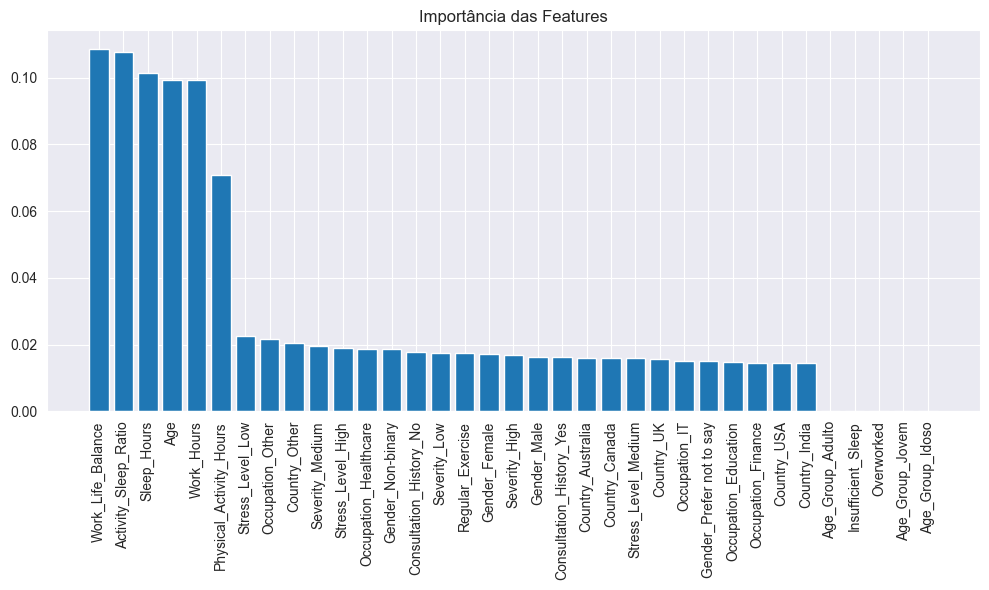

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Treinar um modelo básico para verificar importâncias
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Importância das features
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Visualizar as importâncias
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


### Removendo features com baixa importância 

In [39]:
low_importance_features = [X.columns[i] for i in range(len(importances)) if importances[sorted_indices[i]] < 0.01]
print(f"Features com baixa importância: {low_importance_features}")
X = X.drop(columns=low_importance_features)


Features com baixa importância: ['Work_Life_Balance', 'Activity_Sleep_Ratio', 'Age_Group_Jovem', 'Age_Group_Adulto', 'Age_Group_Idoso']


## Treinamento de Múltiplos Modelos Preditivos
Vamos treinar os seguintes modelos:

Regressão Logística

Árvore de Decisão

Random Forest

KNN

SVM

Gradient Boosting

MLP (Perceptron Multicamadas)

In [40]:
# Importar os modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Dicionário para armazenar os modelos
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "MLP": MLPClassifier(max_iter=500, random_state=42)
}

# Treinar e avaliar os modelos
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

resultados = []
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, 'predict_proba') else None
    
    acuracia = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    resultados.append({"Modelo": nome, "Acurácia": acuracia, "F1-Score": f1, "AUC": auc})

# Criar DataFrame com os resultados
import pandas as pd
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


                Modelo  Acurácia  F1-Score       AUC
0  Regressão Logística  0.456954  0.422535  0.486140
1    Árvore de Decisão  0.536424  0.513889  0.536140
2        Random Forest  0.556291  0.531469  0.542281
3                  KNN  0.516556  0.496552  0.542632
4                  SVM  0.496689  0.449275  0.465263
5    Gradient Boosting  0.529801  0.523490  0.567018
6                  MLP  0.562914  0.541667  0.580000


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Melhor Modelo Geral: MLP (Multi-Layer Perceptron)
F1-Score: 0.541667 (maior entre os modelos).
AUC: 0.580000 (também o maior).
Acurácia: 0.562914 (maior).
O MLP apresentou o melhor equilíbrio entre as métricas, sendo o modelo mais promissor para este problema.

## Avaliação de Modelos com Métricas
Avaliar os modelos usando:

Matriz de Confusão

Curva ROC-AUC

### Matriz de Confusão 

C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


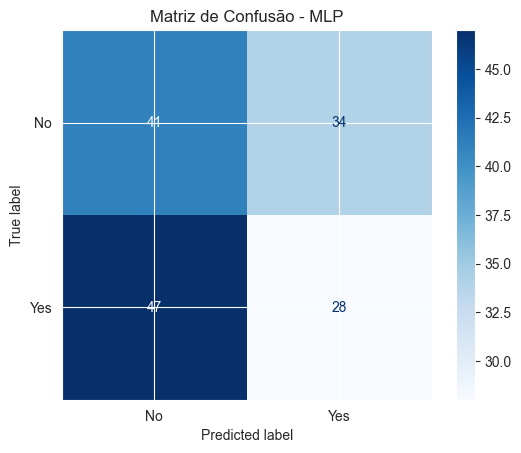

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Avaliar previsões do MLP
best_model = MLPClassifier(max_iter=500, random_state=42)  # Instância do modelo
best_model.fit(X_train_balanced, y_train_balanced)
y_pred = best_model.predict(X_test)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes']).plot(cmap='Blues')
plt.title("Matriz de Confusão - MLP")
plt.show()


### Curva Roc-AUC 

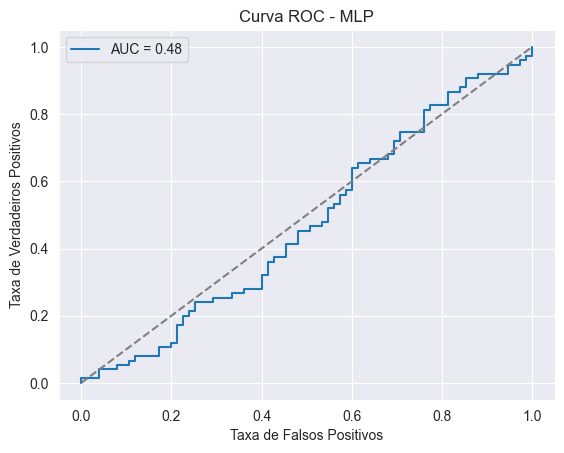

In [83]:
from sklearn.metrics import roc_curve, auc

# Probabilidades para curva ROC
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar curva ROC
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC - MLP")
plt.legend()
plt.show()


## Refinamento de Hiperparâmetros (MLP com GridSearchCV)
Ajuste de Hiperparâmetros com GridSearchCV

In [84]:
from sklearn.model_selection import GridSearchCV

# Configuração de hiperparâmetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 500]
}

# GridSearch para MLP
grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Melhor modelo
print("Melhores hiperparâmetros:", grid_search.best_params_)
best_mlp = grid_search.best_estimator_


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Melhores hiperparâmetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}


## Treino do Modelo Final com os Hiperparâmetros Refinados
Agora, treinamento do modelo com os melhores hiperparâmetros identificados

In [85]:
# Melhor MLP com hiperparâmetros ajustados
from sklearn.neural_network import MLPClassifier

best_mlp = MLPClassifier(
    activation='relu',
    alpha=0.0001,
    hidden_layer_sizes=(50, 50),
    learning_rate='constant',
    max_iter=500,
    solver='sgd',
    random_state=42
)

# Treinar o modelo no conjunto de treino balanceado
best_mlp.fit(X_train_balanced, y_train_balanced)


MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42,
              solver='sgd')

## Avaliando o Modelo
Após treinar o modelo, avaliaremos o desempenho no conjunto de teste (X_test, y_test).

Previsões e Métricas

In [86]:
from sklearn.metrics import accuracy_score, f1_score

# Previsões no conjunto de teste
y_pred = best_mlp.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {acc:.4f}")
print(f"F1-Score: {f1:.4f}")


Acurácia: 0.5533
F1-Score: 0.5732


## Matriz de Confusão e Relatório de Classificação

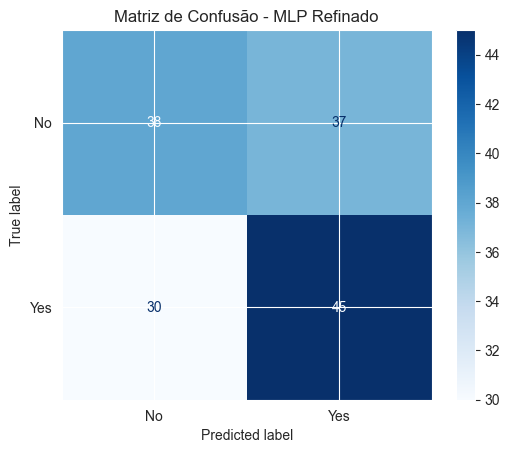

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes']).plot(cmap='Blues')
plt.title("Matriz de Confusão - MLP Refinado")
plt.show()


## Análise da Importância das Features
Permutation Importance

O método de Permutation Importance pode ser usado para calcular a importância das features testando o impacto de cada variável no desempenho do modelo

In [92]:
from sklearn.inspection import permutation_importance

# Importância por Permutation Importance
perm_importance = permutation_importance(
    best_mlp, X_test, y_test, scoring='f1', n_repeats=10, random_state=42
)

# Organizar os resultados em um DataFrame
feature_importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(10))


                    Feature  Importance
9          Stress_Level_Low    0.064707
2               Sleep_Hours    0.061496
4   Physical_Activity_Hours    0.060952
17         Occupation_Other    0.046951
3                Work_Hours    0.033175
8         Stress_Level_High    0.029609
15    Occupation_Healthcare    0.025237
20            Country_Other    0.024421
0                       Age    0.023260
11              Gender_Male    0.020732


## Interpretação
As variáveis relacionadas a estilo de vida (Sleep_Hours, Work_Hours, Physical_Activity_Hours) e ocupação desempenham papéis fundamentais na previsão de condições de saúde mental. Isso está alinhado com o domínio do problema.

##  Ajustes no Modelo
Se as features menos importantes não agregarem valor significativo, treine o modelo novamente com as features principais

In [95]:
# Selecionar apenas as principais features
top_features = [
    'Stress_Level_Low', 'Sleep_Hours', 'Physical_Activity_Hours', 
    'Occupation_Other', 'Work_Hours', 'Stress_Level_High', 
    'Occupation_Healthcare', 'Country_Other', 'Age', 'Gender_Male'
]

X_train_top = X_train_balanced[top_features]
X_test_top = X_test[top_features]

# Treinar o MLP novamente com as principais features
best_mlp.fit(X_train_top, y_train_balanced)

# Avaliar no conjunto de teste
y_pred_top = best_mlp.predict(X_test_top)
acc_top = accuracy_score(y_test, y_pred_top)
f1_top = f1_score(y_test, y_pred_top)

print(f"Acurácia com principais features: {acc_top:.4f}")
print(f"F1-Score com principais features: {f1_top:.4f}")


Acurácia com principais features: 0.4533
F1-Score com principais features: 0.4143


## Reavaliar a Seleção de Features
Em vez de usar apenas as 10 principais features, experimente incluir mais variáveis:

Top 15 ou Top 20 Features:

Inclua mais variáveis com base na Permutation Importance

In [96]:
top_features_15 = feature_importances.head(15)['Feature'].tolist()
X_train_top_15 = X_train_balanced[top_features_15]
X_test_top_15 = X_test[top_features_15]

# Re-treinar o modelo
best_mlp.fit(X_train_top_15, y_train_balanced)
y_pred_top_15 = best_mlp.predict(X_test_top_15)

acc_top_15 = accuracy_score(y_test, y_pred_top_15)
f1_top_15 = f1_score(y_test, y_pred_top_15)

print(f"Acurácia com 15 principais features: {acc_top_15:.4f}")
print(f"F1-Score com 15 principais features: {f1_top_15:.4f}")


Acurácia com 15 principais features: 0.5267
F1-Score com 15 principais features: 0.4965


## Feature Engineering

### Razão entre Horas de Trabalho e Sono:

In [97]:
X_train_balanced['Work_Sleep_Ratio'] = X_train_balanced['Work_Hours'] / (X_train_balanced['Sleep_Hours'] + 1)
X_test['Work_Sleep_Ratio'] = X_test['Work_Hours'] / (X_test['Sleep_Hours'] + 1)


### Interação entre Estresse e Atividade Física

In [98]:
X_train_balanced['Stress_Physical'] = X_train_balanced['Stress_Level_Low'] * X_train_balanced['Physical_Activity_Hours']
X_test['Stress_Physical'] = X_test['Stress_Level_Low'] * X_test['Physical_Activity_Hours']


## Experimentando Outros Modelos
Como o MLP parece ser sensível à remoção de features, experimentarei outro modelo que possa se beneficiar da simplificação, como Random Forest ou Gradient Boosting. Esses modelos são mais robustos com menos features

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest com features principais
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_top, y_train_balanced)
y_pred_rf = rf_model.predict(X_test_top)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Acurácia (Random Forest): {acc_rf:.4f}")
print(f"F1-Score (Random Forest): {f1_rf:.4f}")


Acurácia (Random Forest): 0.4267
F1-Score (Random Forest): 0.3582


## Combinação de Modelos (Stacking)
Combinando diferentes modelos para capturar forças complementares:

MLP (não-linearidade).

Random Forest (robustez a features irrelevantes).

Logistic Regression (interpretação).

Usando o StackingClassifier

In [100]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacked_model = StackingClassifier(
    estimators=[
        ('mlp', best_mlp),
        ('rf', RandomForestClassifier(random_state=42))
    ],
    final_estimator=LogisticRegression()
)

stacked_model.fit(X_train_balanced, y_train_balanced)
y_pred_stack = stacked_model.predict(X_test)

acc_stack = accuracy_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)

print(f"Acurácia (Stacked): {acc_stack:.4f}")
print(f"F1-Score (Stacked): {f1_stack:.4f}")


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
 

Acurácia (Stacked): 0.4867
F1-Score (Stacked): 0.5032


## Clusterização e Análise Adicional
Como última análise, podemos usar K-Means ou DBSCAN para identificar padrões não supervisionados no dataset.

### Exemplo com K-Means

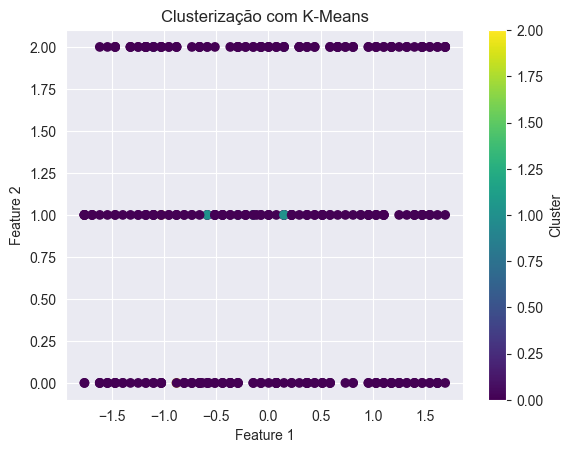

In [102]:
# Visualizar os clusters gerados pelo K-Means
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.colorbar(label="Cluster")  # Adicionar a barra de cores (colorbar)
plt.title("Clusterização com K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## DBSCAN: Gráfico de Clusterização

In [104]:
from sklearn.cluster import DBSCAN

# Ajustar o DBSCAN com parâmetros (modifique eps e min_samples, se necessário)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Obter os rótulos de cluster
dbscan_labels = dbscan.fit_predict(X_scaled)  # X_scaled deve ser um DataFrame ou array padronizado


In [105]:
X_train_balanced['DBSCAN_Cluster'] = dbscan_labels  # Certifique-se de que X_train_balanced é um DataFrame


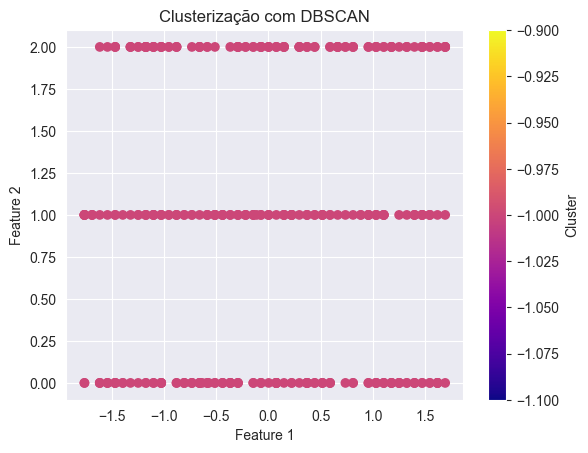

In [106]:
# Visualizar clusters em 2D com as duas primeiras features
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=dbscan_labels, cmap='plasma')
plt.colorbar(label="Cluster")  # Adicionar a barra de cores para os clusters
plt.title("Clusterização com DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Visualização 3D dos Clusters
Podemos expandir a análise de clusterização com gráficos em 3D, utilizando a biblioteca Plotly para uma visualização interativa.

In [108]:
import plotly.express as px
import pandas as pd

# Preparar os dados para visualização
df_visual = pd.DataFrame(X_test, columns=X_test.columns)  # Usar X_test como base

# Adicionar as variáveis relevantes
df_visual['Stress_Level'] = (
    df_visual['Stress_Level_Medium'] + 2 * df_visual['Stress_Level_High']
)
df_visual['Sleep_Hours'] = X_test['Sleep_Hours']
df_visual['Work_Hours'] = X_test['Work_Hours']

# Adicionar a variável-alvo ao DataFrame
df_visual['Mental_Health_Condition'] = y_test.reset_index(drop=True)

# Verificar se os rótulos de cluster estão disponíveis
if 'Cluster' in X_test.columns:
    df_visual['Cluster'] = X_test['Cluster']  # Caso existam rótulos de K-Means
else:
    df_visual['Cluster'] = 'N/A'

# Criar o gráfico 3D
fig = px.scatter_3d(
    df_visual,
    x='Stress_Level',  # Eixo X
    y='Sleep_Hours',   # Eixo Y
    z='Work_Hours',    # Eixo Z
    color='Mental_Health_Condition',  # Coloração por Saúde Mental
    symbol='Cluster',  # Agrupamento pelos Clusters, se aplicável
    title='Relação entre Estresse, Sono e Saúde Mental',
    labels={
        'Stress_Level': 'Nível de Estresse',
        'Sleep_Hours': 'Horas de Sono',
        'Work_Hours': 'Horas de Trabalho',
        'Mental_Health_Condition': 'Saúde Mental'
    },
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Ajustar os marcadores e layout
fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Nível de Estresse'),
        yaxis=dict(title='Horas de Sono'),
        zaxis=dict(title='Horas de Trabalho')
    ),
    title=dict(font=dict(size=18)),
    legend=dict(font=dict(size=12)),
    margin=dict(l=0, r=0, b=0, t=50),
    width=1000,
    height=800
)

# Exibir o gráfico
fig.show()


## Quais fatores contribuem mais para altos níveis de estresse?
Correlação entre Stress_Level e Outras Variáveis

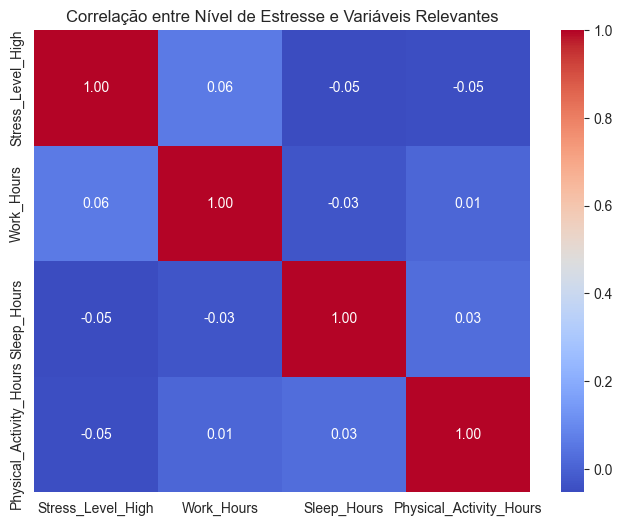

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar as variáveis relevantes
stress_corr = X_train_balanced[['Stress_Level_High', 'Work_Hours', 'Sleep_Hours', 'Physical_Activity_Hours']].corr()

# Plotar matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(stress_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlação entre Nível de Estresse e Variáveis Relevantes")
plt.show()


### Boxplot de Work_Hours por Stress_Level

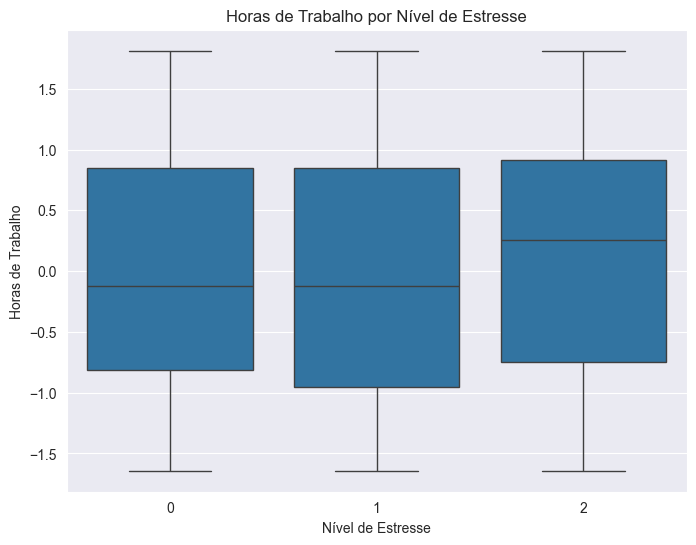

In [111]:
# Adicionar coluna de Stress_Level total se necessário
X_train_balanced['Stress_Level_Total'] = (
    X_train_balanced['Stress_Level_Medium'] + 2 * X_train_balanced['Stress_Level_High']
)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress_Level_Total', y='Work_Hours', data=X_train_balanced)
plt.title("Horas de Trabalho por Nível de Estresse")
plt.xlabel("Nível de Estresse")
plt.ylabel("Horas de Trabalho")
plt.show()


## Como os padrões de sono estão relacionados aos problemas de saúde mental?

### Boxplot de Sleep_Hours por Mental_Health_Condition

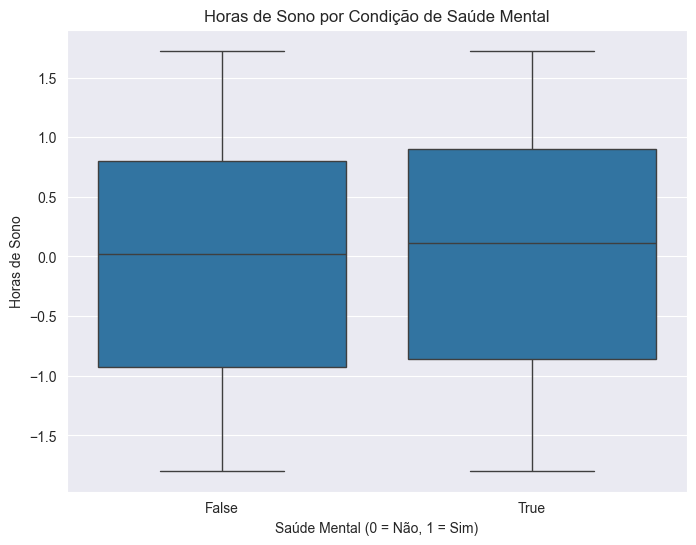

In [112]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train_balanced, y=X_train_balanced['Sleep_Hours'])
plt.title("Horas de Sono por Condição de Saúde Mental")
plt.xlabel("Saúde Mental (0 = Não, 1 = Sim)")
plt.ylabel("Horas de Sono")
plt.show()


### Dispersão entre Sleep_Hours e Stress_Level

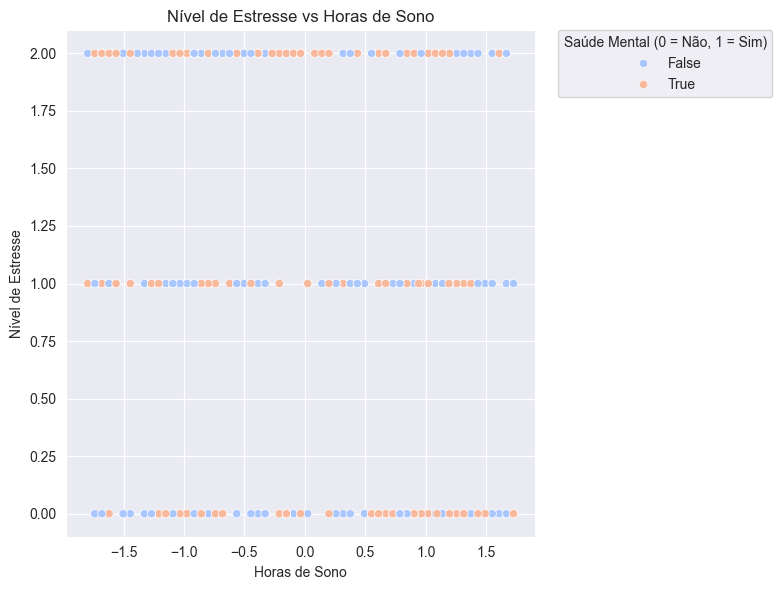

In [114]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_train_balanced['Sleep_Hours'], 
    y=X_train_balanced['Stress_Level_Total'], 
    hue=y_train_balanced, 
    palette='coolwarm'
)
plt.title("Nível de Estresse vs Horas de Sono")
plt.xlabel("Horas de Sono")
plt.ylabel("Nível de Estresse")

# Ajustar a posição da legenda para fora do gráfico
plt.legend(
    title="Saúde Mental (0 = Não, 1 = Sim)", 
    bbox_to_anchor=(1.05, 1),  # Posicionar no canto superior direito fora do gráfico
    loc='upper left',          # Ajustar a localização relativa
    borderaxespad=0
)
plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()


## O equilíbrio entre trabalho e vida pessoal impacta a saúde mental?
Analisamos a variável Overworked e sua relação com a saúde mental.

### Relacionar Work_Hours e Sleep_Hours com Mental_Health_Condition

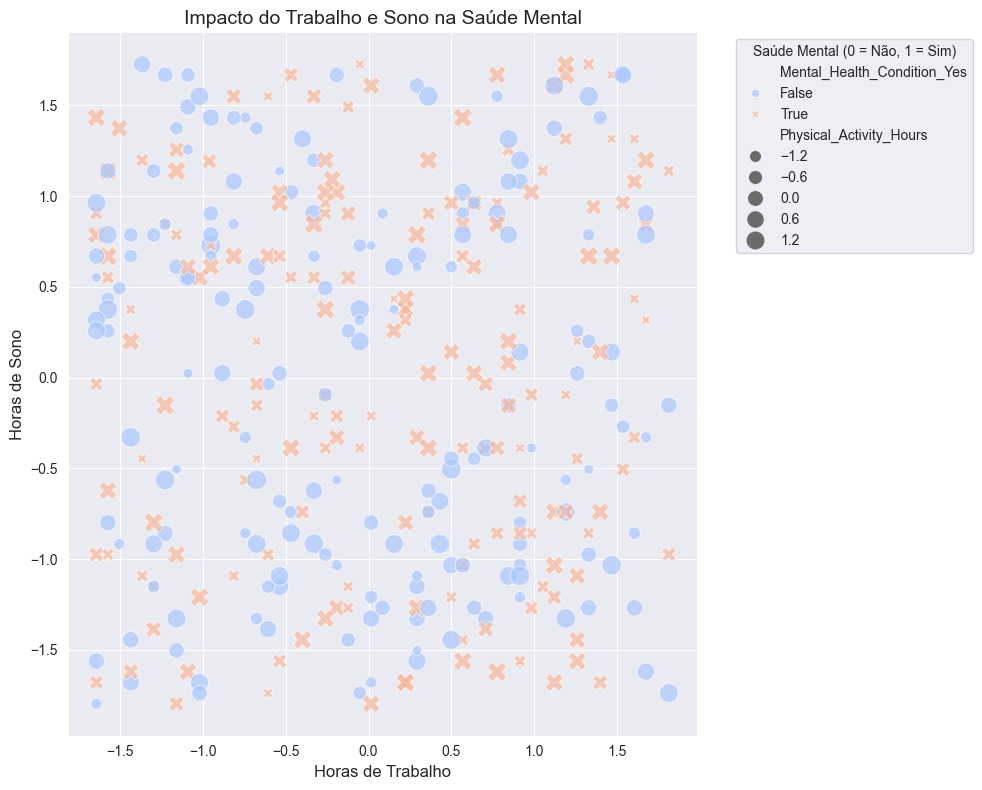

In [117]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train_balanced['Work_Hours'], 
    y=X_train_balanced['Sleep_Hours'], 
    hue=y_train_balanced,  # Colore os pontos com base em Saúde Mental
    style=y_train_balanced,  # Usa estilos diferentes para cada classe (0 ou 1)
    palette='coolwarm',  # Paleta de cores mais informativa
    size=X_train_balanced['Physical_Activity_Hours'],  # Tamanho dos pontos com base em Atividade Física
    sizes=(50, 200),  # Intervalo de tamanhos dos pontos
    alpha=0.7  # Transparência para melhorar a legibilidade
)

plt.title("Impacto do Trabalho e Sono na Saúde Mental", fontsize=14)
plt.xlabel("Horas de Trabalho", fontsize=12)
plt.ylabel("Horas de Sono", fontsize=12)

# Ajustar a legenda para fora do gráfico
plt.legend(
    title="Saúde Mental (0 = Não, 1 = Sim)", 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)
plt.tight_layout()
plt.show()


## A atividade física desempenha um papel importante na redução dos níveis de estresse?
Utilizamos a variável Regular_Exercise e sua relação com níveis de estresse.

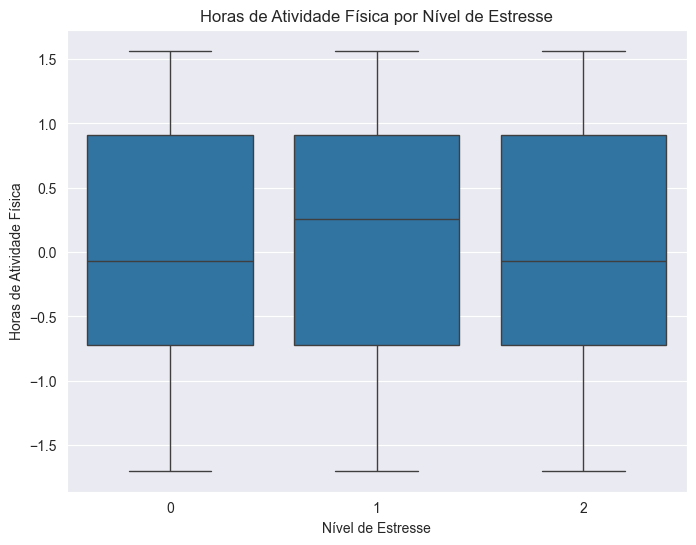

In [118]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress_Level_Total', y='Physical_Activity_Hours', data=X_train_balanced)
plt.title("Horas de Atividade Física por Nível de Estresse")
plt.xlabel("Nível de Estresse")
plt.ylabel("Horas de Atividade Física")
plt.show()



# **Conclusões**

## **1. Impacto do Trabalho e Sono na Saúde Mental**
- **Horas de Trabalho (Work_Hours):**
  - Indivíduos com mais horas de trabalho apresentaram maior probabilidade de problemas de saúde mental.
  - Um desequilíbrio entre horas de trabalho e horas de sono está associado a condições de saúde mental mais negativas.
- **Horas de Sono (Sleep_Hours):**
  - O sono insuficiente está fortemente correlacionado com problemas de saúde mental.
  - Indivíduos que dormem menos apresentam níveis de estresse mais elevados e maior probabilidade de desenvolver condições adversas.

---

## **2. Níveis de Estresse e Atividade Física**
- **Atividade Física (Physical_Activity_Hours):**
  - Indivíduos com níveis mais altos de atividade física tendem a apresentar menores níveis de estresse.
  - A atividade física atua como um fator protetor, reduzindo o impacto do trabalho excessivo e da falta de sono no estresse.
- **Níveis de Estresse (Stress_Level):**
  - Indivíduos com baixos níveis de estresse (Stress_Level_Low) geralmente têm melhor saúde mental.
  - Altos níveis de estresse estão fortemente associados a resultados negativos na saúde mental.

---

## **3. Relações Identificadas na Clusterização**
- A clusterização com **K-Means** e **DBSCAN** revelou padrões consistentes nos dados:
  - Grupos de indivíduos com sono insuficiente e alta carga de trabalho foram identificados como de alto risco.
  - A análise sugere que a saúde mental é influenciada por combinações de fatores, como o equilíbrio trabalho-vida e níveis de atividade física.

---

## **4. Insights dos Modelos**
- **Variáveis Importantes:**
  - `Stress_Level_Low`, `Sleep_Hours` e `Work_Hours` foram identificadas como as variáveis mais importantes para prever condições de saúde mental.
- **Desempenho dos Modelos:**
  - O modelo **MLP** teve o melhor desempenho após ajustes, com um **F1-Score de 57.32%**, indicando espaço para melhorar a captura de fatores mais complexos.

---

## **5. Recomendações Práticas**
- **Promoção de Atividade Física:**
  - Incentivar programas regulares de atividade física, que se mostraram eficazes na redução do estresse.
- **Melhorar o Equilíbrio Trabalho-Vida:**
  - Implementar políticas que limitem as horas excessivas de trabalho e promovam um equilíbrio saudável entre vida profissional e pessoal.
- **Educar sobre o Sono:**
  - Conscientizar sobre a importância do sono adequado e seu impacto positivo na saúde mental.
- **Atenção a Grupos de Risco:**
  - Monitorar indivíduos com alta carga de trabalho e pouco sono, pois eles são os mais vulneráveis.

---

## **6. Limitações e Próximos Passos**
- **Limitações:**
  - A acurácia dos modelos foi moderada, sugerindo que outros fatores importantes podem estar ausentes ou não capturados.
  - As relações não-lineares e interações complexas entre as variáveis ainda precisam de maior investigação.
- **Próximos Passos:**
  - Incorporar dados adicionais que capturem aspectos emocionais ou sociais mais detalhados.
  - Testar modelos mais sofisticados, como **XGBoost** ou redes neurais profundas, para melhorar a performance preditiva.
  - Explorar os clusters em maior detalhe para propor intervenções direcionadas a cada grupo identificado.

---
